<a href="https://colab.research.google.com/github/Karthikraja93/EDA/blob/main/DH_Kaggle_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

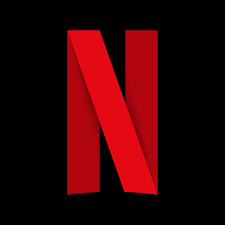


---
# **Netflix Movies & TV Shows Analysis**
---


**Highlights**

*   Increasing trend of content addition is observed on Netflix over years
*   Most of the content is added during festive months
*   Drama is the biggest genre across globe
*   Target audience is Adults. Most of the Movie/TV Show ratings shows that the content is for Mature Audience or having Strong Parental Guidance
*   Netflix likes to keep the content as fresh (very close to release dates of Movies/ TV Shows) as possible


> **Import Packages**



In [19]:
import io
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings("ignore")

> **Import file from local & Read the file**



*There are 7787 rows & 12 Columns*

In [3]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['netflix_titles.csv']))
df.head()

Saving netflix_titles.csv to netflix_titles (4).csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...



> **Check for Nulls**



*Nulls are present in director, cast, country, date_added, rating columns*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB




> **Extract Year from Date Addition Columns**

*It can be used to understand aggregations if any at Year Level & also can be compared with release date to understand how soon netflix is uploading content*


In [5]:
df1 = df.copy()

#Removing Dates with Nulls
df1 = df1[df1['date_added'].notna()]

df1['added_year'] = df1['date_added'].apply(lambda x: x[-4:])

> **Comparing Movie & TV Show Trend by Year Uploaded on Netflix**





Text(0.5, 1.0, 'Additions on Platform across Years')

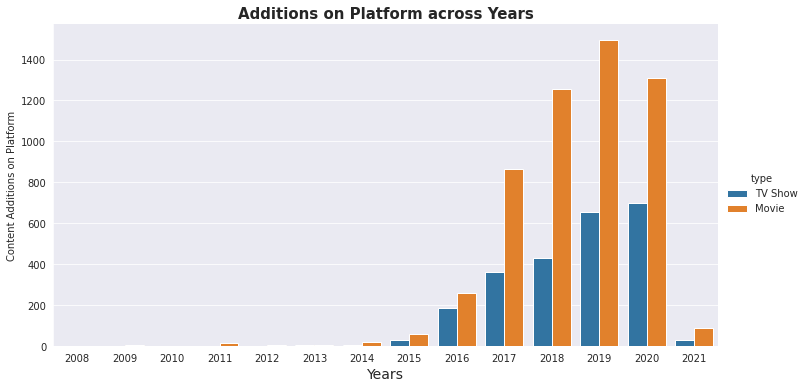

In [6]:
df1['added_year'] = df1['added_year'].astype(int)
with sns.axes_style('darkgrid'):
    g = sns.catplot(x = "added_year", hue = "type" ,data=df1, aspect=2.0,kind='count')
    g.set_ylabels("Total")

plt.xlabel('Years', fontsize=14)
plt.ylabel('Content Additions on Platform', fontsize=10)
plt.title('Additions on Platform across Years',fontsize=15, fontweight='bold')

**Key Observations**

*   Content addition (Movies & TV Shows) shows **Increasing trend** over years. Movies on the platform increased by ~6X times and TV shows by ~4X times from **2016 to 2020**

*Note: Lower movies number in 2020 can be attributed to Covid - 19. Also huge dip in 2021 is due to data availability till Apr -  2021* 

Text(0.5, 1.0, 'Additions on Platform across Months')

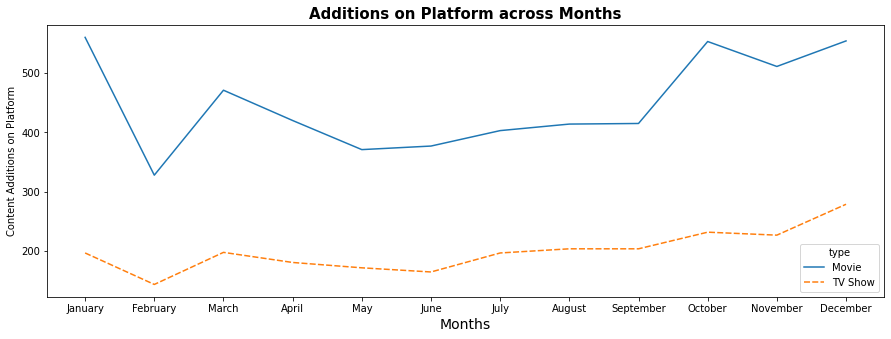

In [7]:
#Extract Month from date added
df1['month'] = df1['date_added'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

#Aggregation at Month X Type level
month_df = df1.groupby(['month', 'type']).agg({'show_id':'count'}).rename_axis([None], axis=1).reset_index()

#Sort Month column 
months = {'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,'July': 7,'August': 8,'September': 9,'October': 10,'November': 11,'December': 12}
month_df["month_number"] = month_df["month"].map(months)
month_df = month_df.sort_values(by=['month_number']).reset_index()


plt.figure(figsize=(15,5))
sns.lineplot(data=month_df, x="month", y="show_id", hue="type", style="type",)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Content Additions on Platform', fontsize=10)
plt.title('Additions on Platform across Months',fontsize=15, fontweight='bold')

**Key Observations**

*   Movies & TV. Shows show similar trend across months, with **peak** observed during **Oct - Jan** months (festive period across globe)



> **Ratings**





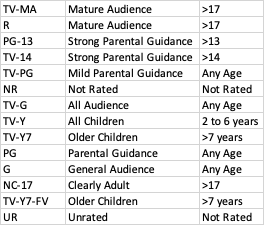

*Source - https://www.spectrum.net/support/tv/tv-and-movie-ratings-descriptions/*



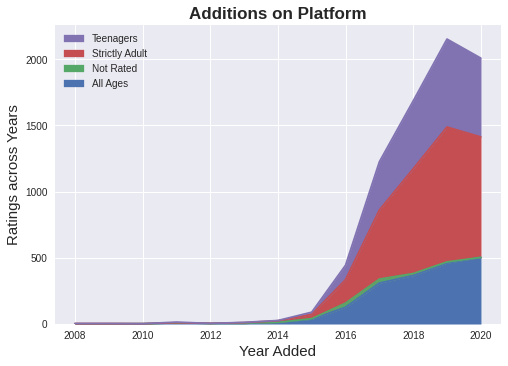

In [8]:
#Function to Bucket - Ratings

def ratings_bucket(x):
    if x=='TV-MA':
        return 'Strictly Adult'
    elif x=='TV-14':
        return 'Teenagers'
    elif x=='TV-PG':
        return 'All Ages'
    elif x=='R':
        return 'Strictly Adult'
    elif x=='PG-13':
        return 'Teenagers'
    elif x=='TV-Y':
        return 'All Ages'
    elif x=='TV-Y7':
        return 'All Ages'
    elif x=='PG':
        return 'All Ages'
    elif x=='TV-G':
        return 'All Ages'
    elif x=='NR':
        return 'Not Rated'
    elif x=='G':
        return 'All Ages'
    elif x=='TV-Y7-FV':
        return 'All Ages'
    elif x=='UR':
        return 'Not Rated'
    elif x=='NC-17':
        return 'Strictly Adult'
    return 'Not Rated'

#New column with Bucketed ratings
df1['rating_bucket']=df1[['rating']].applymap(lambda x:ratings_bucket(x))


plt.style.use('seaborn')

#Excluding 2021 (since data available only till april)
df1[df1['added_year']!=2021].groupby(['added_year', 'rating_bucket'])['rating_bucket'].count().unstack().fillna(0).plot.area()
plt.xlabel('Year Added', fontsize=15)
plt.ylabel('Ratings across Years', fontsize=15)
plt.title('Additions on Platform',fontsize=17, fontweight='bold')

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=True))
ax.legend(handles, labels)
plt.show()

**Key Observations**



*   **Strictly Adult** content is **increasing rapidly over years** & has more number of Movies/TV Shows
*   Teenagers content is comparatively slighly higher than All Ages content

> **Genre**



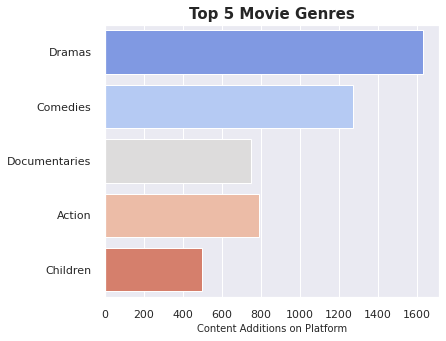

In [10]:
#Clean listed_in column for Primary Genre
genre_df = df1.copy()
genre_df['listed_in'] = genre_df['listed_in'].replace({'International':'','TV':'','Shows':'','Movies':'',',':'','British':''},regex = True)
genre_df = genre_df.replace(np.nan, '', regex=True)
genre_df['listed_in'] = genre_df.listed_in.str.split().str.get(0)

#Plot for Top 5 Movie Genres
plt.figure(figsize=(6,5))
sns.set(style="darkgrid")
ax = sns.countplot(y="listed_in", data=genre_df, palette="coolwarm", order=genre_df[genre_df['type']=='Movie']['listed_in'].value_counts().index[0:5])
plt.title('Top 5 Movie Genres', fontsize=15, fontweight='bold')
plt.xlabel('Content Additions on Platform', fontsize=10)
plt.ylabel('', fontsize=10)
plt.show()


**Key Observations**



*   **Drama** as a genre is popular for Movie buffs across globe
*   Next popular genre is Comedy. People like to watch light hearted movies too

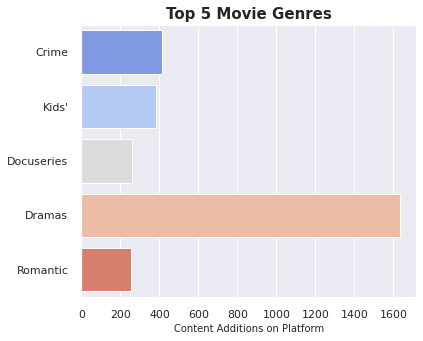

In [11]:

plt.figure(figsize=(6,5))
sns.set(style="darkgrid")
ax = sns.countplot(y="listed_in", data=genre_df, palette="coolwarm", order=genre_df[genre_df['type']=='TV Show']['listed_in'].value_counts().index[0:5])
plt.title('Top 5 Movie Genres', fontsize=15, fontweight='bold')
plt.xlabel('Content Additions on Platform', fontsize=10)
plt.ylabel('', fontsize=10)
plt.show()

**Key Observations**



*   **Drama** as a genre is popular by multi folds in TV Shows 
*   Next popular genre is Crime

In [12]:
#Identifying Primary Countries (Since Country column has multiple countries attributed to Single Movie/TV Show)
genre_df['country'] = genre_df['country'].replace('',genre_df['country'].mode()[0])
genre_df['primary_country'] = genre_df['country'].apply(lambda x: x.split(",")[0])
primary_country_genre_df =  genre_df[(genre_df['primary_country']=='United States') | (genre_df['primary_country']=='United Kingdom') | (genre_df['primary_country']=='India') | (genre_df['primary_country']=='Canada') | (genre_df['primary_country']=='Japan')].groupby(['primary_country','listed_in'],as_index=False).agg({'show_id':'count'}).sort_values(['show_id'], ascending=[False])

#To generate the plot showing Genre distribution by Top Countries - upgrade plotly and restart the kernel/session
#!pip install --upgrade plotly
fig = px.sunburst(primary_country_genre_df, path = ['primary_country', 'listed_in'], values = 'show_id', color = 'primary_country')
fig.update_layout(title_text='Distribution of Genres in Top 5 Countries', title_x=0.5)                  
fig.show()

**Key Observations**



*   **US, India, UK, Canada, Japan** are Top 5 countries with high Netflix Content
*   US & India have majority of people liking Dramas and Comedies
*   Japanese love Anime clearly




> **Duration**



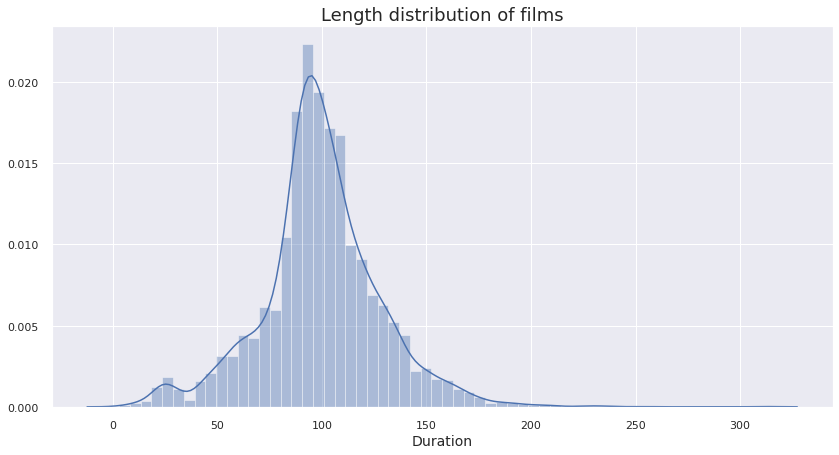

In [13]:
#Duration of Movies
movies_df = df1[df1['type']=='Movie']

movies_df['durations_mins'] = [int(i.split(' ')[0]) for i in movies_df.groupby('type').get_group('Movie').duration.dropna()]
plt.figure(figsize=(14, 7))

sns.distplot(movies_df['durations_mins'], bins=60).set(ylabel=None)

plt.title('Length distribution of films', fontsize=18)
plt.xlabel('Duration', fontsize=14)
plt.show()

Avg Movie Duration is around 100 mins

In [14]:
#Function for % Grand Total of a Column of Dataframe
def percentage_of_total(dataframe, col):
    dataframe[col+'%_of_total'] = 1.0* dataframe[col]/sum(dataframe[col])


In [15]:
# Tv Show Seasons 
tv_shows_df = df1[df1['type']=='TV Show']['duration'].value_counts().to_frame()
percentage_of_total(tv_shows_df,'duration')

In [16]:
tv_shows_df

,duration,duration%_of_total
1 Season,1608,0.670000
2 Seasons,378,0.157500
3 Seasons,183,0.076250
4 Seasons,86,0.035833
5 Seasons,57,0.023750
6 Seasons,30,0.012500
7 Seasons,19,0.007917
8 Seasons,18,0.007500
9 Seasons,8,0.003333
10 Seasons,5,0.002083


**Key Observations**



*   About 85% of Tv Shows just have  **Season 1** (67%) and **Season 2** (16%)
*   Even though the content is available for more than 1 season Netflix havent uploaded it.Probably this can be attributed to people not liking the content


> **Time taken to Upload from Release Year**



In [17]:
#Years to Upload Calculation
df1['years_to_upload'] = df1['added_year']-df1['release_year']

#Excluding Movies/TV Shows with release year less than 2008 (as netflix started adding content from 2008)
df2 = df1[~ (df1['years_to_upload']<0) & ~(df1['release_year']<2008)]['years_to_upload'].value_counts().to_frame()

#Calculating %'s of Grand Total
percentage_of_total(df2,'years_to_upload')
df2

,years_to_upload,years_to_upload%_of_total
0,2825,0.412288
1,1484,0.216579
2,642,0.093695
3,439,0.064069
4,336,0.049037
5,226,0.032983
6,217,0.031670
7,169,0.024664
8,161,0.023497
9,134,0.019556


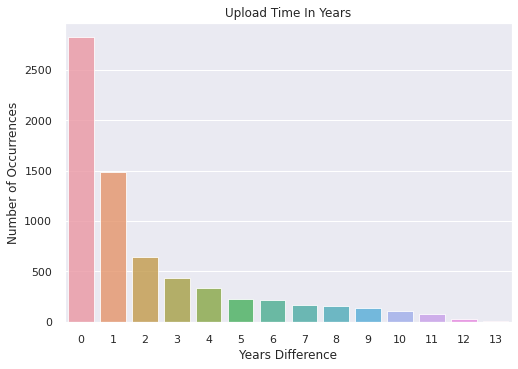

In [18]:
diff_count  = df1[~ (df1['years_to_upload']<0) & ~(df1['release_year']<2008)]['years_to_upload'].value_counts()
sns.barplot(diff_count.index, diff_count.values, alpha=0.8)
plt.title('Upload Time In Years')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Years Difference', fontsize=12)
plt.show()

**Key Observations**



*   More than 60% of the content in Netflix is less than 1 year from release date

*Note - The data considers latest release date of TV shows having more than 1 season*

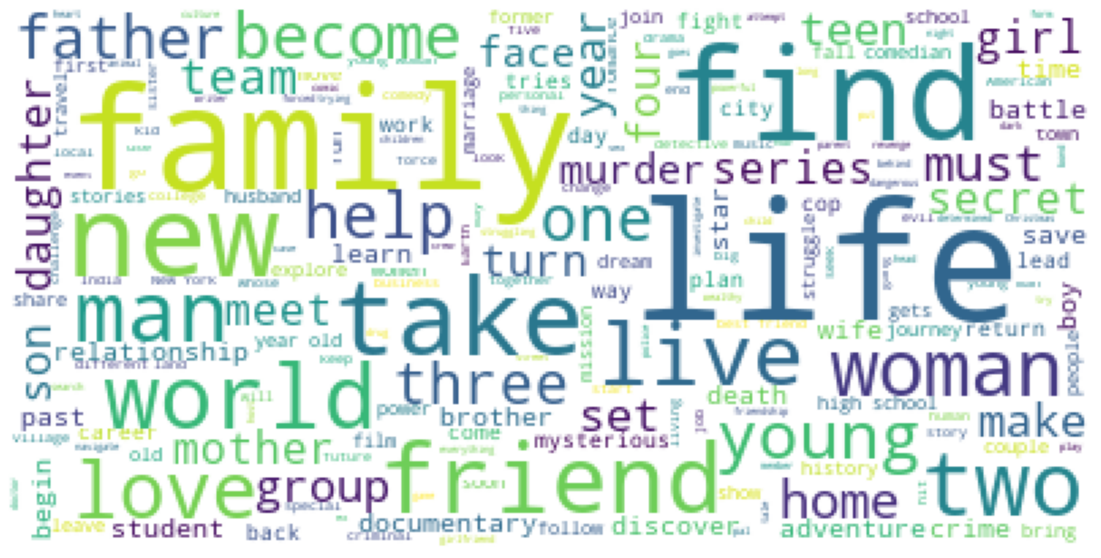

In [20]:
cloud= wordcloud.WordCloud(background_color='white', max_font_size=60, 
                                relative_scaling=1).generate(' '.join(df1.description))
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud)

Family, Life, Love, Friend seems to be most commonly used repeated words in descriptions